In [2268]:
# Importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2269]:
# Importing day.csv
dayDF = pd.read_csv('day.csv')

In [2270]:
# Looking at the first five rows
dayDF.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2271]:
#Dropping columns which are irrelevant for analysis
dayDF = dayDF.drop(["instant","dteday","casual","registered"], axis = 1)

In [2272]:
dayDF.shape

(730, 12)

In [2273]:
#Checking datatype and null values in each column
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 68.6+ KB


In [2274]:
#Converting columns 'season', 'mnth', 'weekday' and 'weathersit' to string datatype
dayDF["season"] = dayDF["season"].astype(str) 
dayDF["mnth"] = dayDF["mnth"].astype(str) 
dayDF["weekday"] = dayDF["weekday"].astype(str) 
dayDF["weathersit"] = dayDF["weathersit"].astype(str) 

In [2275]:
#Mapping numeric values in column 'season' to relevant categorical info
dayDF[['season']] = dayDF[['season']].apply(lambda x:x.map({"1":"spring", "2":"summer", "3":"fall", "4":"winter"}))

In [2276]:
#Mapping numeric values in column 'mnth' to relevant categorical info
dayDF[['mnth']] = dayDF[['mnth']].apply(lambda x:x.map({"1":"January", "2":"February", "3":"March", "4":"April","5":"May", "6":"June", "7":"July", "8":"August","9":"September", "10":"October", "11":"November", "12":"December"}))

In [2277]:
#Mapping numeric values in column 'weekday' to relevant categorical info
dayDF[['weekday']] = dayDF[['weekday']].apply(lambda x:x.map({"0":"Sunday", "1":"Monday", "2":"Tuesday", "3":"Wednesday","4":"Thursday", "5":"Friday", "6":"Saturday"}))

In [2278]:
#Mapping numeric values in column 'weathersit' to relevant categorical info
dayDF[['weathersit']] = dayDF[['weathersit']].apply(lambda x:x.map({"1":"Clear", "2":"Mist", "3":"Snow", "4":"Rain"}))

In [2279]:
#Checking top fives rows of dataframe to verify the mapping of above columns
dayDF.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [2280]:
#Create dummy variables for 'season' column and dropping the first column
temp = pd.get_dummies(dayDF['season'], drop_first = True)

# Add the results to dayDF
dayDF = pd.concat([dayDF, temp], axis = 1)

# Drop 'season' as we have created the dummies for it
dayDF.drop(['season'], axis = 1, inplace = True)

#Checking the top 5 rows of dataframe
dayDF.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [2281]:
#Create dummy variables for 'mnth' column and dropping the first column
temp = pd.get_dummies(dayDF['mnth'], drop_first = True)

# Add the results to dayDF
dayDF = pd.concat([dayDF, temp], axis = 1)

# Drop 'mnth' as we have created the dummies for it
dayDF.drop(['mnth'], axis = 1, inplace = True)

#Checking the top 5 rows of dataframe
dayDF.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,December,February,January,July,June,March,May,November,October,September
0,0,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [2282]:
#Create dummy variables for 'weekday' column and dropping the first column
temp = pd.get_dummies(dayDF['weekday'], drop_first = True)

# Add the results to dayDF
dayDF = pd.concat([dayDF, temp], axis = 1)

# Drop 'weekday' as we have created the dummies for it
dayDF.drop(['weekday'], axis = 1, inplace = True)

#Checking the top 5 rows of dataframe
dayDF.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,1


In [2283]:
#Create dummy variables for 'weathersit' column and dropping the first column
temp = pd.get_dummies(dayDF['weathersit'], drop_first = True)

# Add the results to dayDF
dayDF = pd.concat([dayDF, temp], axis = 1)

# Drop 'weathersit' as we have created the dummies for it
dayDF.drop(['weathersit'], axis = 1, inplace = True)

#Checking the top 5 rows of dataframe
dayDF.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist,Snow
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [2284]:
#Print the count of number of columns in dayDF dataframe
len(dayDF.columns)

30

In [2285]:
from sklearn.model_selection import train_test_split

#Splitting the datarows in ratio of 70:30 and create traing and test data respectively

df_train, df_test = train_test_split(dayDF, train_size = 0.7, test_size = 0.3, random_state = 100)

In [2286]:
from sklearn.preprocessing import MinMaxScaler

#Creating object of min-max scalar
scaler = MinMaxScaler()

In [2287]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist,Snow
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,1,0


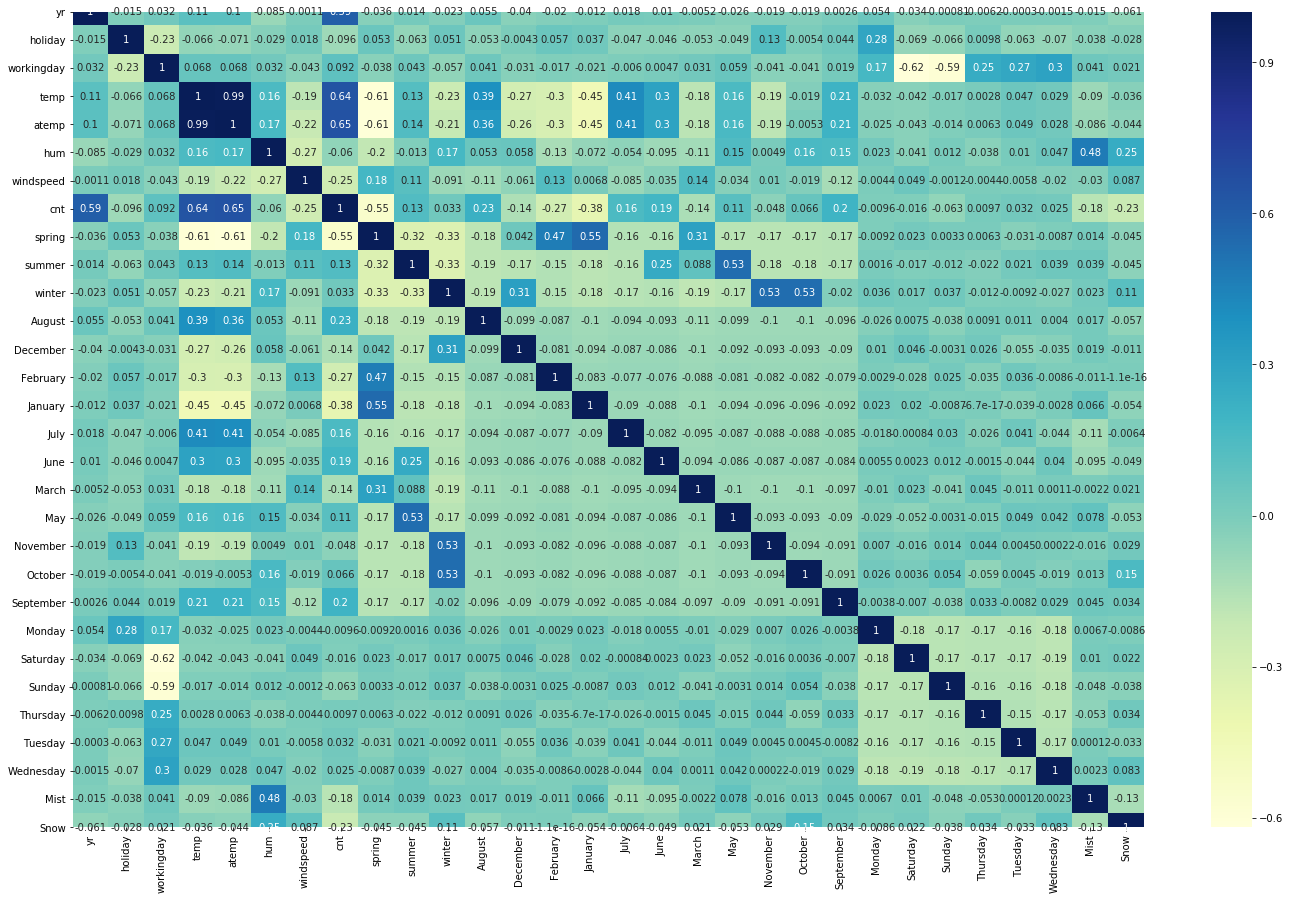

In [2288]:
# Plotting heatmap to understand the correlation between variables
plt.figure(figsize = (24, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [2289]:
#Preparing X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [2290]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2291]:
# Running RFE, with the objective to identify top 13 significant variables, out of 30 variables present in dayDF dataframe
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE
rfe = RFE(lm, 13)             
rfe = rfe.fit(X_train, y_train)

In [2292]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 12),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1),
 ('August', True, 1),
 ('December', False, 4),
 ('February', False, 6),
 ('January', False, 5),
 ('July', True, 1),
 ('June', True, 1),
 ('March', False, 8),
 ('May', False, 16),
 ('November', False, 3),
 ('October', False, 7),
 ('September', False, 17),
 ('Monday', False, 10),
 ('Saturday', True, 1),
 ('Sunday', False, 9),
 ('Thursday', False, 14),
 ('Tuesday', False, 11),
 ('Wednesday', False, 15),
 ('Mist', True, 1),
 ('Snow', True, 1)]

In [2293]:
# 13 columns, which are most significant
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'August', 'July', 'June', 'Saturday', 'Mist', 'Snow'],
      dtype='object')

In [2294]:
# 17 columns, which are left out because of it's less significance
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'summer', 'December', 'February', 'January',
       'March', 'May', 'November', 'October', 'September', 'Monday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [2295]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [2296]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

In [2297]:
# Running the linear model
lr1 = sm.OLS(y_train,X_train_lm).fit()

In [2298]:
#Let's see the summary of our LR1
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.4
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          2.80e-188
Time:                        16:15:17   Log-Likelihood:                 507.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     496   BIC:                            -926.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3242      0.031     10.385      0.0

In [2299]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2300]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.77
2,temp,21.10
4,windspeed,4.08
5,spring,2.54
11,Mist,2.24
6,winter,2.14
0,yr,2.06
8,July,1.77
7,August,1.72
9,June,1.54


### From the above summary, it is evident that variable November has P value > 0.05, which can't be neglected. Hence it needs to be dropped

In [2301]:
#Dropping column 'November' from X_train_rfe and assigning it to X_train_new
X = X_train_rfe.drop(["Saturday"], axis = 1)

In [2302]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X)

In [2303]:
# Running the linear model
lr2 = sm.OLS(y_train,X_train_lm).fit()

In [2304]:
#Let's see the summary of our LR2
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          9.05e-189
Time:                        16:15:17   Log-Likelihood:                 505.38
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     497   BIC:                            -929.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3292      0.031     10.564      0.0

In [2305]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.76
2,temp,21.10
4,windspeed,4.05
5,spring,2.53
10,Mist,2.24
6,winter,2.14
0,yr,2.06
8,July,1.77
7,August,1.72
9,June,1.54


### From the above summary table, we can find that none of the P values exceeds > 0.05

In [2306]:
#Dropping column 'hum', duw to its high correlation with other columns

X = X.drop(["hum"], axis = 1)
X_train_lm = sm.add_constant(X)
lr3 = sm.OLS(y_train,X_train_lm).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.4
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          2.36e-185
Time:                        16:15:17   Log-Likelihood:                 494.46
No. Observations:                 510   AIC:                            -964.9
Df Residuals:                     498   BIC:                            -914.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2355      0.024      9.686      0.0

In [2307]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.77
3,windspeed,4.05
0,yr,2.06
4,spring,1.68
6,August,1.65
7,July,1.64
5,winter,1.57
9,Mist,1.53
8,June,1.48
10,Snow,1.08


In [2308]:
# By trial and error, we found that the model accuracy drops by signifincant amount, if we drop temp variable. 
# Hence dropping column 'windspeed', due to its high correlation with temp variable

X = X.drop(["windspeed"], axis = 1)
X_train_lm = sm.add_constant(X)
lr4 = sm.OLS(y_train,X_train_lm).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     227.6
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          9.48e-179
Time:                        16:15:17   Log-Likelihood:                 476.01
No. Observations:                 510   AIC:                            -930.0
Df Residuals:                     499   BIC:                            -883.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1729      0.023      7.569      0.0

In [2309]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.74
0,yr,2.05
5,August,1.61
6,July,1.60
4,winter,1.53
8,Mist,1.53
7,June,1.47
3,spring,1.31
9,Snow,1.07
1,holiday,1.04


##### From above VIF summary table, it can be seen that VIF for none of the variable > 5. Hence there is no significant correlation between variables

In [2310]:
#Predicting values of y_train using the model creating above and assigning it to y_train_price
y_train_price = lr4.predict(X_train_lm)

In [2311]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

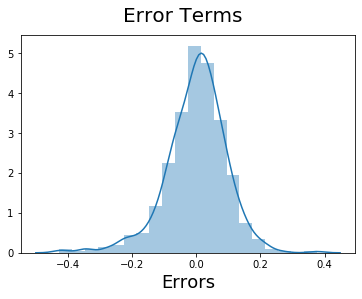

In [2312]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

### Error Terms shown above is normally distributed with the mean centered at 0.0

In [2313]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Apply scaler() to all the columns except the 'dummy' variables to test dataframe

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [2314]:
y_test = df_test.pop('cnt')
X_test = df_test

In [2315]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [2316]:
#Predicting values of test dataset, using model created above
y_pred = lr4.predict(X_test_new)

In [2317]:
#Comparing the true and predicted values from test dataset and calculating the model accuracy
from sklearn.metrics import r2_score
r2_score(y_true=y_test , y_pred=y_pred)

0.8105323470714831

Text(0, 0.5, 'y_pred')

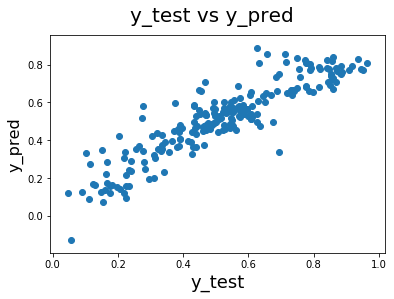

In [2318]:
# Model Evaluation
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## We can see that the equation of our best fitted line is:

### cnt = 0.1729 + 0.2317(yr) - 0.0995(holiday) + 0.5452(temp) - 0.1113(spring) + 0.0488(winter) - 0.0501(August) - 0.1110(July) - 0.0424(June) - 0.0790(Mist) - 0.2997(Snow)